### Data mining 2019 Project 1
# Tweets Sentiment Analysis 
<div style="text-align: right"> Ιγιάμου Περισανίδης Σίμων - sdi1600051 </div>
<div style="text-align: right"> Πυθαρούλιος Κωνσταντίνος- sdi1600142 </div>

Necessary imports.

In [1]:
import nltk
import pandas as pd
import csv
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt

# Preprocessing

In this first step we will preprocess our data. First of all we read the train and the test set from the disk, and save them into two panda dataframes.

In [2]:
trainFile = "../twitter_data/train2017.tsv"
trainSet = pd.read_csv(trainFile, delimiter="\t", quotechar='"', names=['Id','Id2','Sentiment','Text'], header=None)

# Ignore the first two columns, in the training step
trainSet.drop(['Id','Id2'],1,inplace=True)
trainSet.head()

,Sentiment,Text
0,positive,Gas by my house hit $3.39!!!! I'm going to Cha...
1,negative,"Theo Walcott is still shit, watch Rafa and Joh..."
2,negative,"its not that I'm a GSP fan, i just hate Nick D..."
3,negative,Iranian general says Israel's Iron Dome can't ...
4,neutral,"Tehran, Mon Amour: Obama Tried to Establish Ti..."


In [3]:
# Similarly, for the test Set
testFile = "../twitter_data/test2017.tsv"
testSet = pd.read_csv(testFile, delimiter="\t", quotechar='"', names=['Id','Id2','Sentiment','Text'], header=None)

testSet.drop(['Id2','Sentiment'],1,inplace=True)
testSet.head()

,Id,Text
0,801989080477154944,#ArianaGrande Ari By Ariana Grande 80% Full #S...
1,801989272341453952,Ariana Grande KIIS FM Yours Truly CD listening...
2,801990978424962944,Ariana Grande White House Easter Egg Roll in W...
3,801996232553963008,#CD #Musics Ariana Grande Sweet Like Candy 3.4...
4,801998343442407040,SIDE TO SIDE @arianagrande #sidetoside #aria...


#### Cleaning the data
Remove uneccessary symbols, mentions and web links.

In [4]:
import re
from nltk.corpus import stopwords

# Removes @mentions, links and symbols expect hashtags
def cleanTweet(tweet):
    
    # Remove any word that starts with @ (@mentions)
    tweet = re.sub(r'@[A-Za-z0-9_]+','',tweet)

    # Remove any word that start with http (links)
    tweet = re.sub('https?://[A-Za-z0-9./]+','',tweet)
    
    # Remove symbols
    tweet =  ''.join(ch for ch in tweet if ch.isalnum() or ch == ' ' or ch == '#')
    
    # Convert tweet into lowercase
    tweet = tweet.lower()
    
    return tweet

In [5]:
# Iterate all tweets and clean them
for index, row in trainSet.iterrows():
    trainSet.loc[index,'CleanText'] = cleanTweet(trainSet.loc[index,'Text'])

trainSet.head()

,Sentiment,Text,CleanText
0,positive,Gas by my house hit $3.39!!!! I'm going to Cha...,gas by my house hit 339 im going to chapel hil...
1,negative,"Theo Walcott is still shit, watch Rafa and Joh...",theo walcott is still shit watch rafa and john...
2,negative,"its not that I'm a GSP fan, i just hate Nick D...",its not that im a gsp fan i just hate nick dia...
3,negative,Iranian general says Israel's Iron Dome can't ...,iranian general says israels iron dome cant de...
4,neutral,"Tehran, Mon Amour: Obama Tried to Establish Ti...",tehran mon amour obama tried to establish ties...


In [6]:
# Do the same for the test set
for index, row in testSet.iterrows():
    testSet.loc[index,'CleanText'] = cleanTweet(testSet.loc[index,'Text'])

testSet.head()

,Id,Text,CleanText
0,801989080477154944,#ArianaGrande Ari By Ariana Grande 80% Full #S...,#arianagrande ari by ariana grande 80 full #si...
1,801989272341453952,Ariana Grande KIIS FM Yours Truly CD listening...,ariana grande kiis fm yours truly cd listening...
2,801990978424962944,Ariana Grande White House Easter Egg Roll in W...,ariana grande white house easter egg roll in w...
3,801996232553963008,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,#cd #musics ariana grande sweet like candy 34 ...
4,801998343442407040,SIDE TO SIDE @arianagrande #sidetoside #aria...,side to side #sidetoside #arianagrande #mus...


#### Tokenization

In [7]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()

# List that contains a list of the tokens of each tweet
tokens = list()
for index, row in trainSet.iterrows():
    tweetTokens = tknzr.tokenize(trainSet.loc[index,'CleanText'])
    
    # Remove stopwords
    tweetTokens = [w for w in tweetTokens if not w in stopwords.words('english')] 
    
    tokens.append(tweetTokens)
    

# Add tokens as a new column to the dataframe    
trainSet['Tokens'] = pd.Series(tokens,index=trainSet.index)

trainSet.head()

,Sentiment,Text,CleanText,Tokens
0,positive,Gas by my house hit $3.39!!!! I'm going to Cha...,gas by my house hit 339 im going to chapel hil...,"[gas, house, hit, 339, im, going, chapel, hill..."
1,negative,"Theo Walcott is still shit, watch Rafa and Joh...",theo walcott is still shit watch rafa and john...,"[theo, walcott, still, shit, watch, rafa, john..."
2,negative,"its not that I'm a GSP fan, i just hate Nick D...",its not that im a gsp fan i just hate nick dia...,"[im, gsp, fan, hate, nick, diaz, cant, wait, f..."
3,negative,Iranian general says Israel's Iron Dome can't ...,iranian general says israels iron dome cant de...,"[iranian, general, says, israels, iron, dome, ..."
4,neutral,"Tehran, Mon Amour: Obama Tried to Establish Ti...",tehran mon amour obama tried to establish ties...,"[tehran, mon, amour, obama, tried, establish, ..."


In [8]:
# Do the same for the test set
tokens = list()
for index, row in testSet.iterrows():
    tweetTokens = tknzr.tokenize(testSet.loc[index,'CleanText'])
    
    # Remove stopwords
    tweetTokens = [w for w in tweetTokens if not w in stopwords.words('english')] 
    
    tokens.append(tweetTokens)

# Add tokens as a new column to the dataframe    
testSet['Tokens'] = pd.Series(tokens,index=testSet.index)

testSet.head()

,Id,Text,CleanText,Tokens
0,801989080477154944,#ArianaGrande Ari By Ariana Grande 80% Full #S...,#arianagrande ari by ariana grande 80 full #si...,"[#arianagrande, ari, ariana, grande, 80, full,..."
1,801989272341453952,Ariana Grande KIIS FM Yours Truly CD listening...,ariana grande kiis fm yours truly cd listening...,"[ariana, grande, kiis, fm, truly, cd, listenin..."
2,801990978424962944,Ariana Grande White House Easter Egg Roll in W...,ariana grande white house easter egg roll in w...,"[ariana, grande, white, house, easter, egg, ro..."
3,801996232553963008,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,#cd #musics ariana grande sweet like candy 34 ...,"[#cd, #musics, ariana, grande, sweet, like, ca..."
4,801998343442407040,SIDE TO SIDE @arianagrande #sidetoside #aria...,side to side #sidetoside #arianagrande #mus...,"[side, side, #sidetoside, #arianagrande, #musi..."


#### Stemming and lemmatization.
Lemmatization is the method of converting each word to its base form (also known as lemma).

In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# List that contains a list of the lemmas of the tokens of each tweet
lemmasColumn = list()
for index, row in trainSet.iterrows():
    lemmas = list()
    for token in trainSet.loc[index,'Tokens']:
        lemmas.append(lemmatizer.lemmatize(token))
    lemmasColumn.append(lemmas)

# Replace Tokens column with thier lemmas
trainSet.drop(['Tokens'],1,inplace=True)
trainSet['Tokens'] = pd.Series(lemmasColumn,index=trainSet.index)

trainSet.head()

,Sentiment,Text,CleanText,Tokens
0,positive,Gas by my house hit $3.39!!!! I'm going to Cha...,gas by my house hit 339 im going to chapel hil...,"[gas, house, hit, 339, im, going, chapel, hill..."
1,negative,"Theo Walcott is still shit, watch Rafa and Joh...",theo walcott is still shit watch rafa and john...,"[theo, walcott, still, shit, watch, rafa, john..."
2,negative,"its not that I'm a GSP fan, i just hate Nick D...",its not that im a gsp fan i just hate nick dia...,"[im, gsp, fan, hate, nick, diaz, cant, wait, f..."
3,negative,Iranian general says Israel's Iron Dome can't ...,iranian general says israels iron dome cant de...,"[iranian, general, say, israel, iron, dome, ca..."
4,neutral,"Tehran, Mon Amour: Obama Tried to Establish Ti...",tehran mon amour obama tried to establish ties...,"[tehran, mon, amour, obama, tried, establish, ..."


In [10]:
# Do the same for the test Set
lemmatizer = WordNetLemmatizer()

# List that contains a list of the lemmas of the tokens of each tweet
lemmasColumn = list()
for index, row in testSet.iterrows():
    lemmas = list()
    for token in testSet.loc[index,'Tokens']:
        lemmas.append(lemmatizer.lemmatize(token))
    lemmasColumn.append(lemmas)

# Replace Tokens column with thier lemmas
testSet.drop(['Tokens'],1,inplace=True)
testSet['Tokens'] = pd.Series(lemmasColumn,index=testSet.index)

testSet.head()

,Id,Text,CleanText,Tokens
0,801989080477154944,#ArianaGrande Ari By Ariana Grande 80% Full #S...,#arianagrande ari by ariana grande 80 full #si...,"[#arianagrande, ari, ariana, grande, 80, full,..."
1,801989272341453952,Ariana Grande KIIS FM Yours Truly CD listening...,ariana grande kiis fm yours truly cd listening...,"[ariana, grande, kiis, fm, truly, cd, listenin..."
2,801990978424962944,Ariana Grande White House Easter Egg Roll in W...,ariana grande white house easter egg roll in w...,"[ariana, grande, white, house, easter, egg, ro..."
3,801996232553963008,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,#cd #musics ariana grande sweet like candy 34 ...,"[#cd, #musics, ariana, grande, sweet, like, ca..."
4,801998343442407040,SIDE TO SIDE @arianagrande #sidetoside #aria...,side to side #sidetoside #arianagrande #mus...,"[side, side, #sidetoside, #arianagrande, #musi..."


#### Save the processed data.

In [11]:
#trainSet.to_pickle('cleanTrain2017.pkl')
#testSet.to_pickle('cleanTest2017.pkl')

# Data Analysis

Initially, we group the tokens in three lists based on their tweet's sentiment.

In [12]:
# Retrieve trainSet from file
#trainSet = pd.read_pickle('cleanTrain2017.pkl')

# Make lists for positive, negative and neutral tweets.
allTokens = list()
positiveTokens = list()
negativeTokens = list()
neutralTokens = list()
posCount, negCount, neuCount = (0,0,0)
for index, row in trainSet.iterrows():
    if trainSet.loc[index,'Sentiment'] == 'positive':
        posCount +=1
        for token in trainSet.loc[index,'Tokens']:
            positiveTokens.append(token)
    elif trainSet.loc[index,'Sentiment'] == 'negative':
        negCount +=1
        for token in trainSet.loc[index,'Tokens']:
            negativeTokens.append(token)    
    else:
        neuCount +=1
        for token in trainSet.loc[index,'Tokens']:
            neutralTokens.append(token)
    for token in trainSet.loc[index,'Tokens']:
        allTokens.append(token)

#### Pie  

We will plot a pie that displays the classes of the tweets of the train set, in order to visualize the volume of each class relatively to the others.

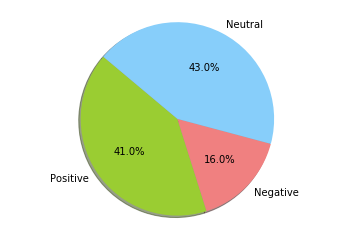

In [13]:
# Data to plot
labels = 'Positive', 'Negative', 'Neutral'
sizes = [posCount, negCount, neuCount]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

As we see, the negative tweets are alot less than the positive and the neutral tweets.

#### Word clouds

The most common words are:


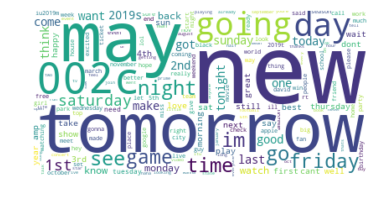

In [14]:
from wordcloud import WordCloud

# Count occurences
from collections import Counter
count = Counter(allTokens)
common = ""
for word, times in count.most_common(200):
    common = common + " " + word

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(common)

print("The most common words are:")
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most common words found in neutral tweets are:


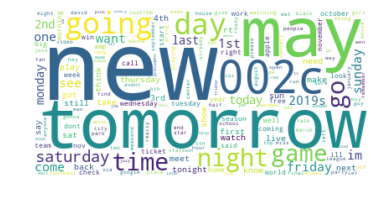

In [15]:
count = Counter(neutralTokens)
common = ""
for word, times in count.most_common(200):
    common = common + " " + word
    
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(common)

print("The most common words found in neutral tweets are:")
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The sets of the words that are found in positive, negative and neutral tweets look something like this.

In [16]:
%%html
<img src="src/venndiagram.png",width=100,height=100>

If we were to print the most common words of the positives or the negative tweets as we did previously for the neutral ones, we would get many words that belong to the intersection of the three sets, and the output would be similar to the previous word cloud. That happends because the negative and positive tweets contain many neutral tokens.
  
For example the most common words in negative tweets are:

In [17]:
print(Counter(negativeTokens).most_common(10))

[('may', 647), ('tomorrow', 612), ('002c', 422), ('u', 370), ('like', 351), ('im', 336), ('day', 316), ('going', 316), ('go', 284), ('get', 278)]


To avoid that, we will print the most common words of each set which are found only in tweets of this set's kind.

Words that were found only in positive tweets:


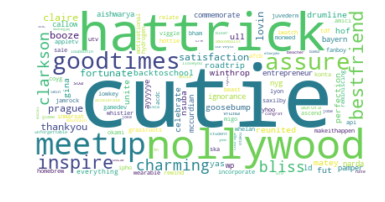

In [18]:
count = Counter(positiveTokens)
common = ""
for word, times in count.most_common():
    if word not in negativeTokens and word not in neutralTokens:
        common = common + " " + word

wordcloud = WordCloud(background_color="white").generate(common)
print("Words that were found only in positive tweets:")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Words that were found only in negative tweets:


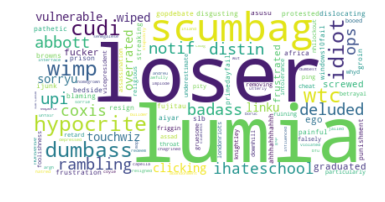

In [19]:
count = Counter(negativeTokens)
common = ""
for word, times in count.most_common():
    if word not in positiveTokens and word not in neutralTokens:
        common = common + " " + word

wordcloud = WordCloud(background_color="white").generate(common)
print("Words that were found only in negative tweets:")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Vectorization

In [20]:
# Retrieve sets from disk
#trainSet = pd.read_pickle('cleanTrain2017.pkl')
#testSet = pd.read_pickle('cleanTest2017.pkl')

#### Bag-of-Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=300, stop_words='english')
bagOfWords = countVectorizer.fit_transform(trainSet['CleanText'])

vectors = list()
for v in bagOfWords.toarray():
    vectors.append(v)

# Save the vectors as a new column in the dataframe
trainSet['bow'] = pd.Series(vectors,index=trainSet.index)

In [22]:
# Do the same for the test set
bagOfWords = countVectorizer.fit_transform(testSet['CleanText'])

vectors = list()
for v in bagOfWords.toarray():
    vectors.append(v)

# Save the vectors as a new column in the dataframe
testSet['bow'] = pd.Series(vectors,index=testSet.index)

#### Tf-idf

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=300, stop_words='english')
tfidf = tfidfVectorizer.fit_transform(trainSet['CleanText'])
vectors = list()
for v in tfidf.toarray():
    vectors.append(v)

# Save the vectors as a new column in the dataframe
trainSet['tf-idf'] = pd.Series(vectors,index=trainSet.index)

In [24]:
tfidf = tfidfVectorizer.fit_transform(testSet['CleanText'])
vectors = list()
for v in tfidf.toarray():
    vectors.append(v)

# Save the vectors as a new column in the dataframe
testSet['tf-idf'] = pd.Series(vectors,index=testSet.index)
testSet.head()

,Id,Text,CleanText,Tokens,bow,tf-idf
0,801989080477154944,#ArianaGrande Ari By Ariana Grande 80% Full #S...,#arianagrande ari by ariana grande 80 full #si...,"[#arianagrande, ari, ariana, grande, 80, full,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,801989272341453952,Ariana Grande KIIS FM Yours Truly CD listening...,ariana grande kiis fm yours truly cd listening...,"[ariana, grande, kiis, fm, truly, cd, listenin...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,801990978424962944,Ariana Grande White House Easter Egg Roll in W...,ariana grande white house easter egg roll in w...,"[ariana, grande, white, house, easter, egg, ro...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,801996232553963008,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,#cd #musics ariana grande sweet like candy 34 ...,"[#cd, #musics, ariana, grande, sweet, like, ca...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,801998343442407040,SIDE TO SIDE @arianagrande #sidetoside #aria...,side to side #sidetoside #arianagrande #mus...,"[side, side, #sidetoside, #arianagrande, #musi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#### Word2Vec

In [25]:
from gensim.models import Word2Vec

# Train the model using our tweets
w2vModel = Word2Vec(trainSet['Tokens'],size=300,window=5,min_count=100,sg=1,hs=0,negative=10)
w2vModel.train(trainSet['Tokens'], total_examples=len(trainSet['Tokens']),epochs=20)
# save it to disk
#w2vModel.save("w2v.model")

# or load it from file
#w2vModel = Word2Vec.load("w2v.model")

# Let's see what the model says about Obama
w2vModel.wv.most_similar(positive='obama')

C:\Users\Simon\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[('president', 0.41112202405929565),
 ('sander', 0.34545648097991943),
 ('trying', 0.3416840434074402),
 ('bernie', 0.33059170842170715),
 ('biden', 0.31466346979141235),
 ('vote', 0.3055676817893982),
 ('make', 0.30056560039520264),
 ('doesnt', 0.2945540249347687),
 ('leave', 0.27582278847694397),
 ('read', 0.27236613631248474)]

Tokens visualization using t-SNE

C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


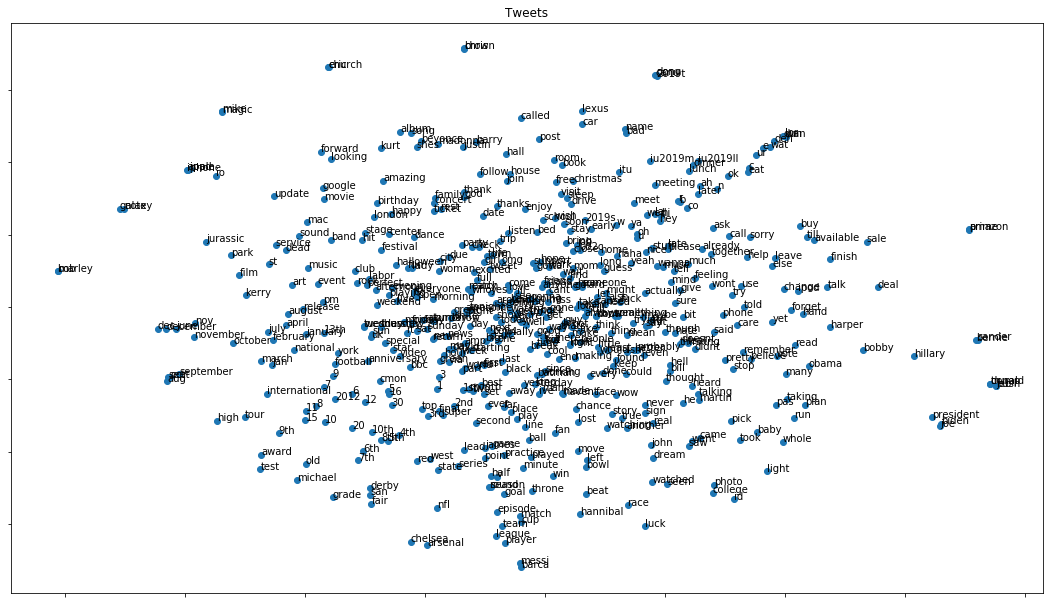

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = w2vModel[w2vModel.wv.vocab]

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
Y = tsne_model.fit_transform(X)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(Y[:, 0], Y[:, 1], 'o')
ax.set_title('Tweets')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks

words = list(w2vModel.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
plt.show()

Now we will use the Word2Vec model to add a vector to each tweet. In order to do this, we compute the mean vector of the tokens of each tweet.

In [27]:
def vectorOfTweet(tokens, w2vModel):
    if not len(tokens):
        return np.zeros(300)
    
    v = list()
    for token in tokens:
        if token in w2vModel:
            # If there is a coresponding vector in the model, add it to the list
            v.append(w2vModel[token])
        else:
            # else, make a random one
            v.append((np.random.rand(300)*2 - 1)) # PROSOXH... NA KANW TO 200 NA MHN EINAI CONSTANT p.x. len(w2vModel['obama']) 
    
    # Compute the mean vector
    summ = np.zeros(300) # TO IDIO KAI EDW
    for vector in v:
        summ += vector
    return summ/len(v)   

In [28]:
vectors = list()
# for every tweet
for index, row in trainSet.iterrows():
    vectors.append(vectorOfTweet(trainSet.loc[index,'Tokens'],w2vModel)) 

# Save the vectors as a new column in the dataframe
trainSet['w2v'] = pd.Series(vectors,index=trainSet.index)

C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [29]:
# Do the same for the test set
vectors = list()
for index, row in testSet.iterrows():
    vectors.append(vectorOfTweet(testSet.loc[index,'Tokens'],w2vModel)) 

# Save the vectors as a new column in the dataframe
testSet['w2v'] = pd.Series(vectors,index=testSet.index)
#testSet.head()

C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


#### Increasing the features
We will add 5 extra features to each tweet, by using 5 lexicons.

In [30]:
def file2Dict(inputFile):
    d={}
    with open(inputFile, encoding="utf8") as f:
        for line in f:
            word,value = line.strip().split('\t',1)
            d[word]=float(value)
    return d

# Given a list of tokens and a lexicon dictionary, this function returns the mean of the lexicon values of the tokens.
def meanOfTweet(tokens, lex):
    m = list()
    for token in tokens:
        if token in lex:
            # If there is a coresponding value in the lexicon, add it to the list
            m.append(lex[token])
    
    # If the list is not empty, return its mean
    if len(m):
        return np.mean(m)
    return 0

In [31]:
affin = file2Dict("../lexica/affin/affin.txt")
emotweet = file2Dict("../lexica/emotweet/valence_tweet.txt")
generic = file2Dict("../lexica/generic/generic.txt")
nrc = file2Dict("../lexica/nrc/val.txt")
nrctag = file2Dict("../lexica/nrctag/val.txt")

In [32]:
means = list()
for index, row in trainSet.iterrows():
    tweetMeans = list()
    tweetMeans.append(meanOfTweet(trainSet.loc[index,'Tokens'],affin))
    tweetMeans.append(meanOfTweet(trainSet.loc[index,'Tokens'],emotweet))
    tweetMeans.append(meanOfTweet(trainSet.loc[index,'Tokens'],generic))
    tweetMeans.append(meanOfTweet(trainSet.loc[index,'Tokens'],nrc))
    tweetMeans.append(meanOfTweet(trainSet.loc[index,'Tokens'],nrctag))
    means.append(tweetMeans)
    
trainSet['Lexicon'] = pd.Series(means,index=trainSet.index)
#trainSet.head()

In [33]:
means = list()
for index, row in testSet.iterrows():
    tweetMeans = list()
    tweetMeans.append(meanOfTweet(testSet.loc[index,'Tokens'],affin))
    tweetMeans.append(meanOfTweet(testSet.loc[index,'Tokens'],emotweet))
    tweetMeans.append(meanOfTweet(testSet.loc[index,'Tokens'],generic))
    tweetMeans.append(meanOfTweet(testSet.loc[index,'Tokens'],nrc))
    tweetMeans.append(meanOfTweet(testSet.loc[index,'Tokens'],nrctag))
    means.append(tweetMeans)
    
testSet['Lexicon'] = pd.Series(means,index=testSet.index)
#testSet.head()

#### Add one more feature

In [34]:
# Add a characteristic about the tweet's length (before its cleaned)
trainSet['Length'] = [len(text) for text in trainSet.Text]
testSet['Length'] = [len(text) for text in testSet.Text]

In [35]:
testSet.head()

,Id,Text,CleanText,Tokens,bow,tf-idf,w2v,Lexicon,Length
0,801989080477154944,#ArianaGrande Ari By Ariana Grande 80% Full #S...,#arianagrande ari by ariana grande 80 full #si...,"[#arianagrande, ari, ariana, grande, 80, full,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.014496222962883804, 0.044322839856988455, ...","[0, 0.14519240000000003, 0.214362, 0.338599999...",60
1,801989272341453952,Ariana Grande KIIS FM Yours Truly CD listening...,ariana grande kiis fm yours truly cd listening...,"[ariana, grande, kiis, fm, truly, cd, listenin...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06810333438003088, 0.02957255169488333, 0.1...","[0, 0.3221102222222222, 0.38263625, 0.61722222...",77
2,801990978424962944,Ariana Grande White House Easter Egg Roll in W...,ariana grande white house easter egg roll in w...,"[ariana, grande, white, house, easter, egg, ro...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10458323380198406, 0.020707789107891925, -0...","[0, 0.33242025, 0.23303825, 0.3697499999999999...",69
3,801996232553963008,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,#cd #musics ariana grande sweet like candy 34 ...,"[#cd, #musics, ariana, grande, sweet, like, ca...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1435267818476482, 0.07600234942707867, -0.1...","[2.0, 0.22084707142857143, 0.2080843333333334,...",88
4,801998343442407040,SIDE TO SIDE @arianagrande #sidetoside #aria...,side to side #sidetoside #arianagrande #mus...,"[side, side, #sidetoside, #arianagrande, #musi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.1531096099494255, 0.15528947458082293, 0.0...","[0, 0.38382, 0.1286, -0.054, 0.6776666666666666]",94


#### Save the processed data.

In [36]:
#trainSet.to_pickle('vectorizedTrain2017.pkl')
#testSet.to_pickle('vectorizedTest2017.pkl')

# Classification

In [37]:
# Retrieve sets from file
#trainSet = pd.read_pickle('vectorizedTrain2017.pkl')
#testSet = pd.read_pickle('vectorizedTest2017.pkl')

Prepare the arrays for the classification.

In [38]:
# Unify arrays into one
def unify(arr1,arr2,arr3):
    union = list()
    for i,v in enumerate(arr1):
        # features is a numpy array that will contain all the features of the i-th tweet
        features = np.append(arr1[i],arr2[i])
        features = np.append(features,arr3[i])

        union.append(features)
    return np.asarray(union)

In [39]:
from sklearn import metrics

# Convert our features into numpy arrays
bow = np.asarray(trainSet['bow'].tolist())
tf = np.asarray(trainSet['tf-idf'].tolist())
w2v = np.asarray(trainSet['w2v'].tolist())
lex = np.asarray(trainSet['Lexicon'].tolist())
leng = np.asarray(trainSet['Length'].tolist())

train_X_bow = unify(bow,lex,leng)
train_X_tf = unify(tf,lex,leng)
train_X_w2v = unify(w2v,lex,leng)

In [40]:
# Convert our features into numpy arrays
bow = np.asarray(testSet['bow'].tolist())
tf = np.asarray(testSet['tf-idf'].tolist())
w2v = np.asarray(testSet['w2v'].tolist())
lex = np.asarray(testSet['Lexicon'].tolist())
leng = np.asarray(testSet['Length'].tolist())

# Unify arrays into one
test_X_bow = unify(bow,lex,leng)
test_X_tf = unify(tf,lex,leng)
test_X_w2v = unify(w2v,lex,leng)

In [41]:
train_Y = np.asarray(trainSet['Sentiment'].tolist())

# Get the actual sentiment of the test set
test_Y = list()
with open('../twitter_data/SemEval2017_task4_subtaskA_test_English_gold.txt') as f:
    for line in f:
        Id,sent = line.strip().split('\t',1)
        test_Y.append(sent)

In [42]:
d = {'SVM':['-','-','-'],'KNN':['-','-','-']}
# accDf is a dataframe that will store the accuracy of the predictions of each model that we will use.
accDf = pd.DataFrame.from_dict(d, orient='index', columns=['BOW','TF-IDF','W2V'])

### SVM

In [43]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1, probability=False)
svc = svc.fit(train_X_bow, train_Y)

#svmFilename = 'svm_bow_model.sav'
# save the model to disk
#pickle.dump(svc, open(svmFilename, 'wb'))

# load the model from disk
#svc = pickle.load(open(svmFilename, 'rb'))

pred_Y_bow_svm = svc.predict(test_X_bow)

accDf.loc['SVM','BOW'] = "%.3f%%" % (metrics.accuracy_score(test_Y, pred_Y_bow_svm) * 100)

In [44]:
svc = svm.SVC(kernel='linear', C=1, probability=False)
svc = svc.fit(train_X_tf, train_Y)

#svmFilename = 'svm_tf_model.sav'
# save the model to disk
#pickle.dump(svc, open(svmFilename, 'wb'))

# load the model from disk
#svc = pickle.load(open(svmFilename, 'rb'))

pred_Y_tf_svm = svc.predict(test_X_tf)

accDf.loc['SVM','TF-IDF'] = "%.3f%%" % (metrics.accuracy_score(test_Y, pred_Y_tf_svm) * 100)

In [45]:
svc = svm.SVC(kernel='linear', C=1, probability=False)
svc = svc.fit(train_X_w2v, train_Y)

#svmFilename = 'svm_w2v_model.sav'
# save the model to disk
#pickle.dump(svc, open(svmFilename, 'wb'))

# load the model from disk
#svc = pickle.load(open(svmFilename, 'rb'))

pred_Y_w2v_svm = svc.predict(test_X_w2v)

accDf.loc['SVM','W2V'] = "%.3f%%" % (metrics.accuracy_score(test_Y, pred_Y_w2v_svm) * 100)

### Knn

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_X_bow, train_Y)
pred_Y_bow_knn = knn.predict(test_X_bow)
accDf.loc['KNN','BOW'] = "%.3f%%" % (metrics.accuracy_score(test_Y, pred_Y_bow_knn) * 100)

In [48]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_X_tf, train_Y)
pred_Y_tf_knn = knn.predict(test_X_tf)
accDf.loc['KNN','TF-IDF'] = "%.3f%%" % (metrics.accuracy_score(test_Y, pred_Y_tf_knn) * 100)

In [49]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_X_w2v, train_Y)
pred_Y_w2v_knn = knn.predict(test_X_w2v)
accDf.loc['KNN','W2V'] = "%.3f%%" % (metrics.accuracy_score(test_Y, pred_Y_w2v_knn) * 100)

#### Accuracy results:

In [50]:
accDf

,BOW,TF-IDF,W2V
SVM,54.225%,54.054%,57.335%
KNN,54.933%,55.438%,51.767%
